In [ ]:
import os
import pandas as pd
#import pandas_profiling
import numpy as np

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
sns.set_style('ticks')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### datasets
- pdb_data_seq.csv : https://drive.google.com/file/d/1zzEkV9b7RAOYmKKdkQbzQ4W8jxHIh60P/view?usp=share_link
- pdb_data_no_dups.csv : https://drive.google.com/file/d/1xPdfizGj7-tBvG6fjbnNzUmt5PBCo0xf/view?usp=share_link

In [ ]:
#線上直接下載到colab環境
#[安裝]gdown套件:
!pip install --upgrade --no-cache-dir gdown

!gdown -q https://drive.google.com/u/1/uc?id=1zzEkV9b7RAOYmKKdkQbzQ4W8jxHIh60P&export=download
!gdown -q https://drive.google.com/u/1/uc?id=1xPdfizGj7-tBvG6fjbnNzUmt5PBCo0xf&export=download

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


### 資料前處理&EDA

In [ ]:
# Import Dataset
df_dup = pd.read_csv('pdb_data_no_dups.csv')
df_seq = pd.read_csv('pdb_data_seq.csv')

len(df_dup), len(df_seq)

(141401, 467304)

In [ ]:
# Merge the two Data set together
df_merge = pd.read_csv('pdb_data_no_dups.csv').merge(pd.read_csv('pdb_data_seq.csv'), how='inner', on='structureId')
# Drop rows with missing labels
df_merge = df_merge[[type(c) == type('') for c in df_merge.classification.values]]
df_merge = df_merge[[type(c) == type('') for c in df_merge.sequence.values]]
df_merge.reset_index()
df_merge.shape

(471117, 18)

In [ ]:
# Merge the two Data set together
#df_merge = df_dup.merge(df_tmp ,how='inner',on='structureId')
df_merge.rename({'macromoleculeType_x':'macromoleculeType',
                                            'residueCount_y':'residueCount'},axis=1,inplace=True)
df_merge.drop(['macromoleculeType_y','residueCount_x'],axis=1,inplace=True)

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471117 entries, 0 to 471148
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               471117 non-null  object 
 1   classification            471117 non-null  object 
 2   experimentalTechnique     471117 non-null  object 
 3   macromoleculeType         435372 non-null  object 
 4   resolution                449467 non-null  float64
 5   structureMolecularWeight  471117 non-null  float64
 6   crystallizationMethod     314748 non-null  object 
 7   crystallizationTempK      317692 non-null  float64
 8   densityMatthews           389640 non-null  float64
 9   densityPercentSol         389762 non-null  float64
 10  pdbxDetails               385462 non-null  object 
 11  phValue                   340691 non-null  float64
 12  publicationYear           413483 non-null  float64
 13  chainId                   471107 non-null  o

In [ ]:
df_merge.head(3)

,structureId,classification,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20
2,101D,DNA,X-RAY DIFFRACTION,DNA,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24


In [ ]:
# profiling report
#pandas_profiling.ProfileReport(df_merge)

前五大類別: RIBOSOME(12.6%), HYDROLASE(10.2%), TRANSFERASE(8.1%), OXIDOREDUCTASE(7.6%), IMMUNE SYSTEM(3.3%)

wiki-名詞解釋:

- 核糖體(ribosome):舊稱「核糖核蛋白體」或「核蛋白體」，是細胞中的一種胞器，由一大一小兩個次單元結合形成，主要成分是相互纏繞的RNA（稱為「核糖體RNA」，ribosomal RNA，簡稱「rRNA」）和蛋白質（稱為「核糖體蛋白質」，ribosomal protein，簡稱「RP」）。

- 水解酶(Hydrolase):是一種催化化學鍵的水解的酶。

- 轉移酶(Transferase):是一種催化一個分子（稱為供體）的官能團（如甲基或磷酸鹽團）轉移至另一個分子（稱為受體）的酶。

- 氧化還原酶(Oxidoreductase):是一種催化電子由一個分子傳送往另一個分子的酶。

- 免疫系統(Immune system):是生物體體內一系列的生物學結構和進程所組成的疾病防禦系統。

In [ ]:
class_list = ['RIBOSOME','HYDROLASE','TRANSFERASE','OXIDOREDUCTASE','IMMUNE SYSTEM']
class_1 = df_merge.classification =='RIBOSOME'
class_2 = df_merge.classification =='HYDROLASE'
class_3 = df_merge.classification =='TRANSFERASE'
class_4 = df_merge.classification =='OXIDOREDUCTASE'
class_5 = df_merge.classification =='IMMUNE SYSTEM'

In [ ]:
#前五大類合計筆數, 佔全部資料比率
df_merge_sub = df_merge[class_1 + class_2 + class_3 + class_4 + class_5]
df_merge_sub = df_merge_sub.reset_index(drop=True)
len(df_merge_sub),  round(len(df_merge_sub) / len(df_merge), 4)

(197371, 0.4189)

***

### 建立模型(DL model)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(df_merge_sub.classification)
Y.shape

(197371, 5)

In [ ]:
seqs = df_merge_sub.sequence.values
len(seqs)

197371

In [ ]:
seqs_length = []
for i in range(len(seqs)):
    seqs_length.append(len(seqs[i]))

np.max(seqs_length), np.min(seqs_length), round(np.mean(seqs_length)), round(np.std(seqs_length)), len(seqs_length)

(5070, 2, 278, 289, 197371)

#### 使用tokenizer取特徵

In [ ]:
#from tensorflow.keras.preprocessing.text import Tokenizer

# maximum length of sequence, everything afterwards is discarded!
max_length = int(round(np.mean(seqs_length)) + (1*round(np.std(seqs_length)))) #seqs平均長度+seqs 1倍標準差, GPU記憶體不夠大
seqs = df_merge_sub.sequence.values

#create and fit tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(seqs)
#represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(seqs)
X = sequence.pad_sequences(X, maxlen=max_length)

#### 1DCNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

embedding_dim = 30 #tokenizer.vocab length=30
top_classes = len(class_list)

# create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(top_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 567, 30)           780       
                                                                 
 conv1d (Conv1D)             (None, 567, 64)           11584     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 283, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 283, 32)           6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 141, 32)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 4512)              0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [ ]:
# tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0,
#     patience=0,
#     verbose=0,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False,
# )

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# %%time
try:

  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=512, callbacks=[callback])

except KeyboardInterrupt:
    print("KeyboardInterrupt")

Epoch 1/50
309/309 [==============================] - 18s 30ms/step - loss: 0.7946 - accuracy: 0.6760 - val_loss: 0.5697 - val_accuracy: 0.7826
Epoch 2/50
309/309 [==============================] - 9s 30ms/step - loss: 0.4545 - accuracy: 0.8364 - val_loss: 0.3725 - val_accuracy: 0.8692
Epoch 3/50
309/309 [==============================] - 9s 30ms/step - loss: 0.3114 - accuracy: 0.8948 - val_loss: 0.2801 - val_accuracy: 0.9044
Epoch 4/50
309/309 [==============================] - 9s 30ms/step - loss: 0.2304 - accuracy: 0.9255 - val_loss: 0.2255 - val_accuracy: 0.9281
Epoch 5/50
309/309 [==============================] - 9s 30ms/step - loss: 0.1729 - accuracy: 0.9456 - val_loss: 0.2129 - val_accuracy: 0.9341
Epoch 6/50
309/309 [==============================] - 10s 32ms/step - loss: 0.1349 - accuracy: 0.9582 - val_loss: 0.1841 - val_accuracy: 0.9468
Epoch 7/50
309/309 [==============================] - 9s 30ms/step - loss: 0.1105 - accuracy: 0.9669 - val_loss: 0.1628 - val_accuracy: 0.95

### 模型評估

1234/1234 [==============================] - 2s 2ms/step
train-acc = 0.9926787252368647
test-acc = 0.9720329322355922


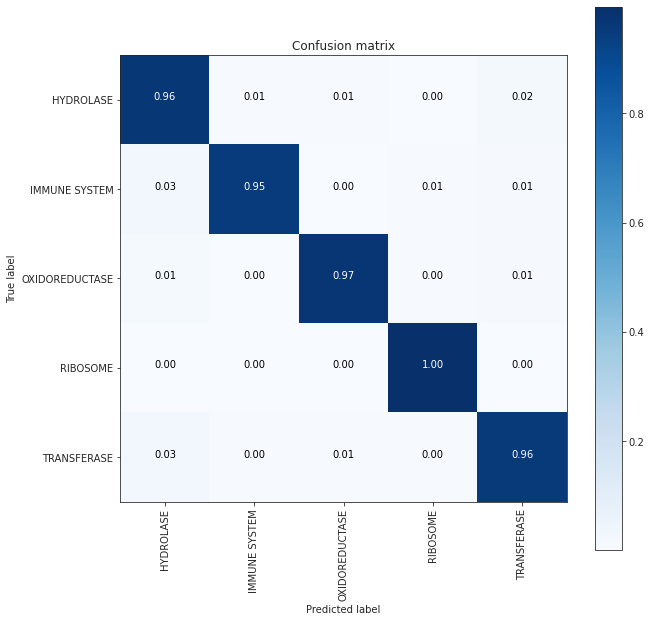

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
#Print F1 score metrics
print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))

                precision    recall  f1-score   support

     HYDROLASE       0.96      0.96      0.96      9594
 IMMUNE SYSTEM       0.96      0.95      0.96      3164
OXIDOREDUCTASE       0.98      0.97      0.97      7087
      RIBOSOME       0.99      1.00      0.99     12114
   TRANSFERASE       0.96      0.96      0.96      7516

      accuracy                           0.97     39475
     macro avg       0.97      0.97      0.97     39475
  weighted avg       0.97      0.97      0.97     39475



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))
# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

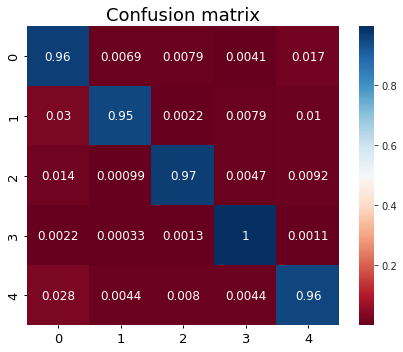

In [ ]:
colormap = plt.cm.RdBu
f, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm,cmap= colormap,annot=True,ax=ax,annot_kws ={'fontsize':12})
kwargs= {'length':3, 'width':1, 'colors':'black','labelsize':13}
ax.tick_params(**kwargs)
ax.tick_params(**kwargs,axis='x')
plt.title ('Confusion matrix', color = 'black',fontsize=18)

plt.tight_layout()
plt.show()

### 儲存模型權重

使用HDF5檔

In [ ]:
model.save_weights('keras_1DCNN_model_weights.h5') # HDF5 file